In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
data = pd.read_excel('fruit.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
data.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [5]:
y = data['name'] 
X = data[['diameter', 'weight', 'red','green','blue']] 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
print("Shapes of training and testing sets:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

Shapes of training and testing sets:
X_train: (8000, 5) X_test: (2000, 5)


In [8]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
print("Descriptive statistics of the training set:")
print(X_train.describe())

Descriptive statistics of the training set:
           diameter        weight           red         green          blue
count  8.000000e+03  8.000000e+03  8.000000e+03  8.000000e+03  8.000000e+03
mean   1.918465e-16 -2.353673e-16 -1.223910e-15 -3.934630e-16  4.307665e-17
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00
min   -3.587335e+00 -3.009222e+00 -3.719122e+00 -3.853798e+00 -1.035479e+00
25%   -7.757418e-01 -7.811548e-01 -6.546481e-01 -6.893741e-01 -1.035479e+00
50%    2.695724e-03 -3.691860e-03  1.570543e-02 -5.174261e-03 -1.509149e-01
75%    7.670496e-01  7.781249e-01  6.860590e-01  6.790256e-01  6.230786e-01
max    3.049869e+00  2.911346e+00  3.367473e+00  3.415825e+00  3.940194e+00


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [10]:
y_pred = svc.predict(X_test)

In [11]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
linear_svc = SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train, y_train)
y_pred_test = linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))
y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Model accuracy score with default hyperparameters: 0.9225
Model accuracy score with linear kernel and C=1.0: 0.9540
Training-set accuracy score: 0.9566


Confusion matrix

 [[987  25]
 [ 67 921]]


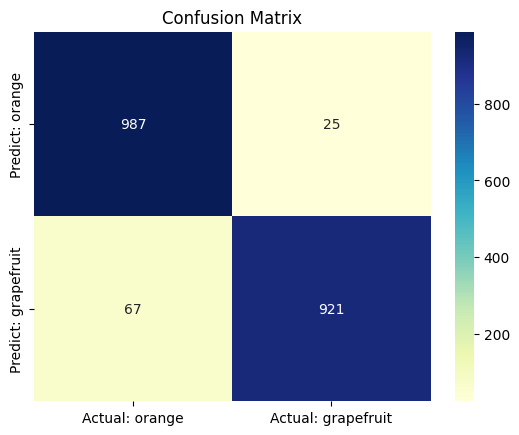

In [12]:
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
class_names = y.unique()  
cm_matrix = pd.DataFrame(data=cm, columns=[f'Actual: {cls}' for cls in class_names], 
                         index=[f'Predict: {cls}' for cls in class_names])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

  grapefruit       0.94      0.98      0.96      1012
      orange       0.97      0.93      0.95       988

    accuracy                           0.95      2000
   macro avg       0.96      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [14]:
c_values = [0.1, 1, 10, 100,1000]
print("\nExperimenting with different C values:")
for c_value in c_values:
    svc = SVC(kernel='linear', C=c_value)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f'Model accuracy score with C={c_value}: {accuracy_score(y_test, y_pred):0.4f}')


Experimenting with different C values:
Model accuracy score with C=0.1: 0.9245
Model accuracy score with C=1: 0.9540
Model accuracy score with C=10: 0.9660
Model accuracy score with C=100: 0.9685
Model accuracy score with C=1000: 0.9685


C:\Users\yahya\AppData\Local\Temp\ipykernel_27596\3672447334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.unique(), y=np.diagonal(cm), palette="viridis")


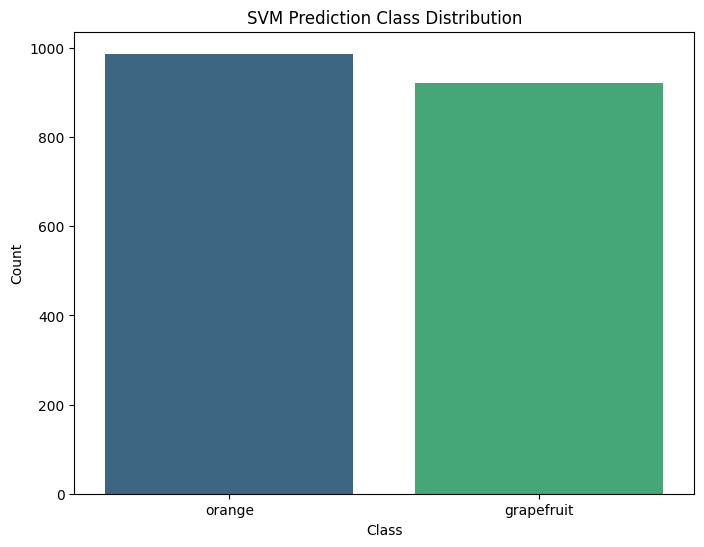

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=y.unique(), y=np.diagonal(cm), palette="viridis")
plt.title("SVM Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [17]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

import pickle
with open("svm_fruit_model.pkl", "wb") as svm_file:
    pickle.dump(svm_model, svm_file)

print("SVM model has been saved successfully!")

SVM model has been saved successfully!
